In [2]:
from src.SimpleEC import SimpleEC
from src.knr import KNNR, wsplit
from matplotlib import pyplot as plt
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [3]:
x = np.linspace(0, 100, 5000)
rng = rnd.RandomState(42)
y = np.sin(4 * x) + rnd.uniform(size=len(x))+np.cos(x**2)

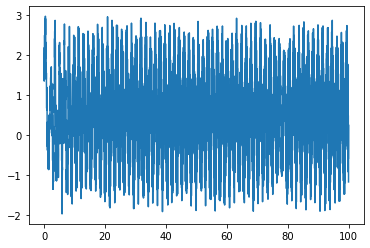

In [4]:
plt.plot(x,y)

In [5]:
Xe, Ye=wsplit(y, 5,1)

In [6]:
#m,tau=7,1
m,tau,k,w,d=20,20,11,'distance','correlation'
data,target=wsplit(y,m,tau)
train = data[:-24]
y_train = target[:-24]
y_test = target[-24:]
n,nt=len(y_train),len(y_test)
knr=KNNR(m,tau,k=k,w=w,d=d)
knr.fit(train,y_train)
y_pred=knr.predict(24)

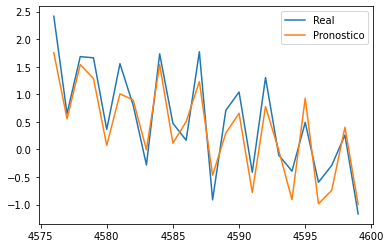

In [7]:
#plt.plot(y_train)
plt.plot(range(n,n+nt), y_test, label='Real')
plt.plot(range(n,n+nt), y_pred, label='Pronostico')
plt.legend()

In [14]:
def fitpred(m,tau,k,w,d,**kwargs):
    kw,kd=int(w),int(d)
    m,tau,k=int(m),int(tau),int(k)
    W={0:'distance',1:'uniform'}
    D={0:'cosine',1:'euclidean',2:'correlation',3:'chebyshev'}
    #print(m,tau,k,W[kw],D[kd])
    y=kwargs['y']
    n=kwargs['n']
    print(y.shape)
    data,target=wsplit(y,m,tau)
    print(data.shape,target.shape)
    train = data[:-n]
    y_train = target[:-n]
    y_v = target[-n:]
    #print(y_train.shape,y_test.shape)
    print(n)
    knr=KNNR(m=m,tau=tau,k=k,w=W[kw],d=D[kd])
    knr.fit(train,y_train)
    y_pred=knr.predict(n)
    y_pred=np.nan_to_num(y_pred,np.mean(y_pred))
    return mse(y_v,y_pred)
    

In [15]:
fitpred(10,5,11,0,3,y=y,n=n)

5000 4576
(5000,)
(4950, 10) (4950,)


1.74188795159952

In [20]:
# y
ec=SimpleEC(fitpred,[(1,32),(1,32),(1,16),(0,1),(0,3)], population_size=64,
            code_size=[5,5,4,1,2], **{'y':y[:-24],'n':24})

array([ 1.78961347,  1.35239961,  2.02380896, ..., -0.29010925,
        0.26153606, -1.16852047])

In [10]:
best,avg=ec.evolve(t=5)

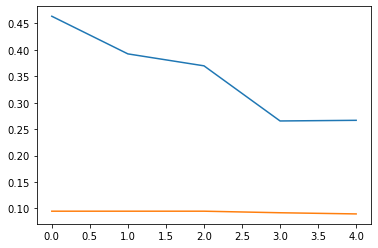

In [11]:
plt.plot(best)
plt.plot(avg)

In [12]:
[ec._gray_to_real(gcode, b) for gcode,b in zip(ec.population[0].code,ec.bounds)]

[22.0, 25.0, 8.0, 1.0, 3.0]

In [14]:
xt,yt=wsplit(y[:-24],22,25)

In [17]:
knr=KNNR(m=22,tau=25,k=8,w='distance',d='chebyshev').fit(xt,yt)
yp=knr.predict(24)

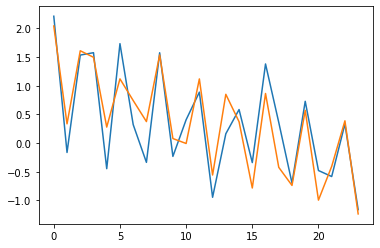

In [18]:
plt.plot(y[-24:])
plt.plot(yp)

In [38]:
mse(yp,y[-24:])

0.13173658587114356

In [39]:
ec.fit[0]

-0.12210045071285214

In [42]:
l=[1,2,3,5,6]

In [45]:
l[1:3]

[2, 3]